In [1]:
#Import Section
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
movies = pd.read_csv('P4-Movie-Ratings.csv')
movies.columns = ['Films','Genre','CriticsRating','AudienceRating','BudgetMn','Year']

In [4]:
#What is category datatype
movies.Year = movies.Year.astype('category')
movies.Films = movies.Films.astype('category')
movies.Genre = movies.Genre.astype('category')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Films           559 non-null    category
 1   Genre           559 non-null    category
 2   CriticsRating   559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMn        559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [5]:
#Display unique items in category
#movies.Genre.cat.categories
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

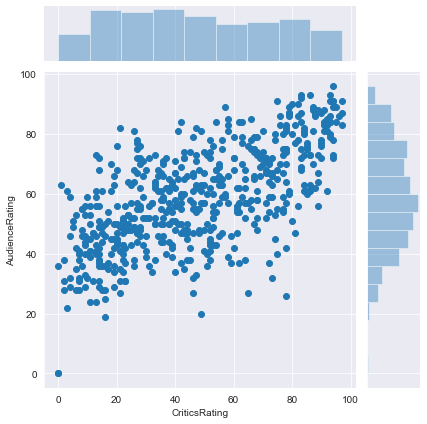

In [6]:
a = sns.jointplot(data=movies,x='CriticsRating',y='AudienceRating')

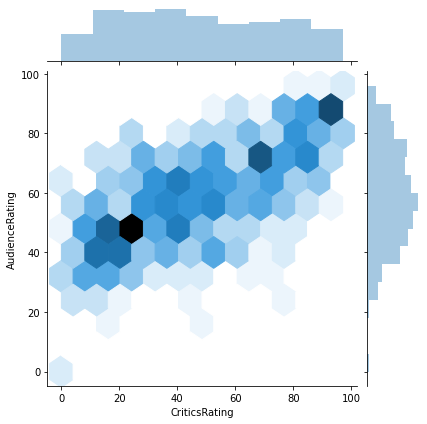

In [10]:
a2 = sns.jointplot(data=movies,x='CriticsRating',y='AudienceRating',kind='hex')

In [55]:
#Histograms

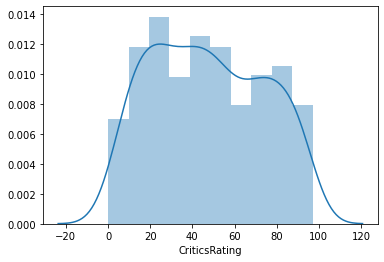

In [57]:
#Seaborn Histogram
m1 =sns.distplot(movies.CriticsRating,bins=10)

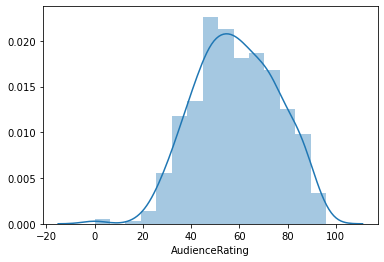

In [59]:
m2 = sns.distplot(movies.AudienceRating,bins=15)

In [60]:
#matpltolib histogram

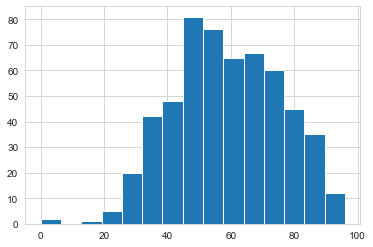

In [72]:
sns.set_style('whitegrid')
n1 = plt.hist(movies.AudienceRating,bins=15)

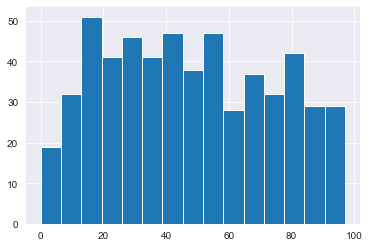

In [70]:
sns.set_style('darkgrid')
n2 = plt.hist(movies.CriticsRating, bins = 15)

In [73]:
#Stack histogram

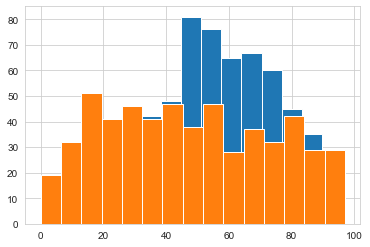

In [75]:
plt.hist(movies.AudienceRating,bins=15)
plt.hist(movies.CriticsRating,bins=15)
plt.show()

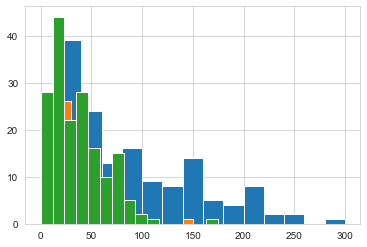

In [97]:
plt.hist(movies[movies['Genre'] == 'Action'].BudgetMn,bins=15)
plt.hist(movies[movies['Genre'] == 'Drama'].BudgetMn,bins=15)
plt.hist(movies[movies['Genre'] == 'Comedy'].BudgetMn,bins=15)

plt.show()

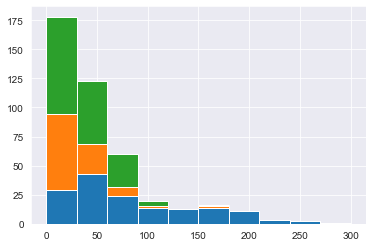

In [103]:
sns.set_style('darkgrid')
plt.hist([movies[movies['Genre'] == 'Action'].BudgetMn,movies[movies['Genre'] == 'Drama'].BudgetMn,
          movies[movies['Genre'] == 'Comedy'].BudgetMn],bins=10,stacked = True)
plt.show()

In [104]:
#Lets do some cool stuff

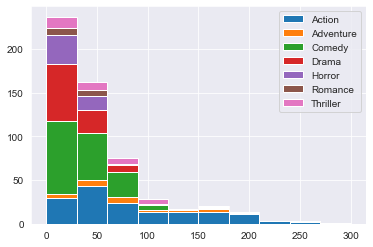

In [7]:
list1 = list()
mylabels = list()
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMn)
    mylabels.append(gen)
    
plt.hist(list1,bins=10,stacked=True, label=mylabels)
plt.legend()
plt.show()

In [ ]:
#KDE plot (Kernal Density Estimation)

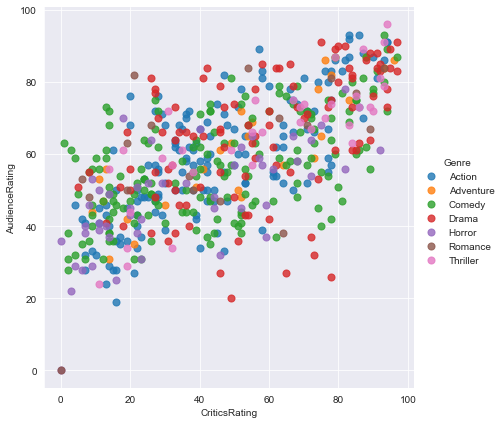

In [137]:
sns.lmplot(data=movies,x='CriticsRating',y='AudienceRating',hue='Genre', fit_reg=False, size = 6,scatter_kws={'s':50})

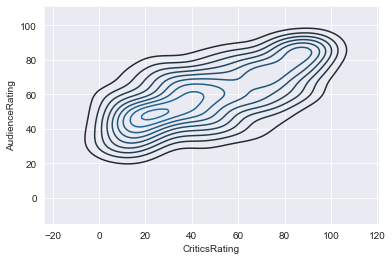

In [141]:
#KDE exampl1
sns.kdeplot(movies.CriticsRating,movies.AudienceRating)

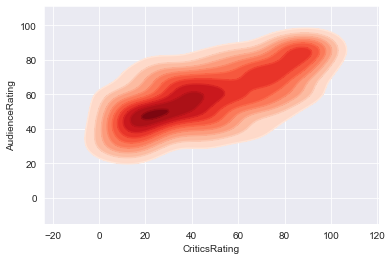

In [56]:
k1 = sns.kdeplot(movies.CriticsRating,movies.AudienceRating,shade=True,shade_lowest=False,cmap='Reds')
#TIP
k2 = sns.kdeplot(movies.CriticsRating,movies.AudienceRating,cmap='Reds')

In [ ]:
#Working with subplots()

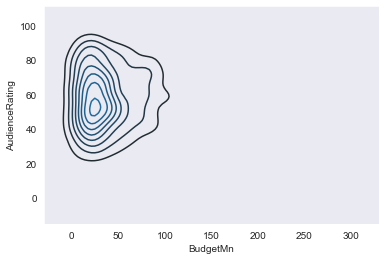

In [158]:
sns.set_style('dark')
k3 = sns.kdeplot(movies.BudgetMn,movies.AudienceRating)

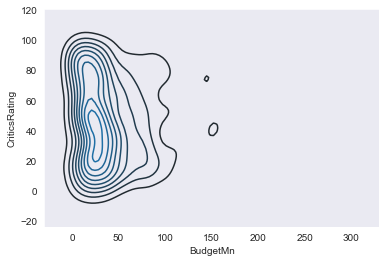

In [159]:
k4 = sns.kdeplot(movies.BudgetMn,movies.CriticsRating)

[(-20.0, 120.0), (0.0, 300.0)]

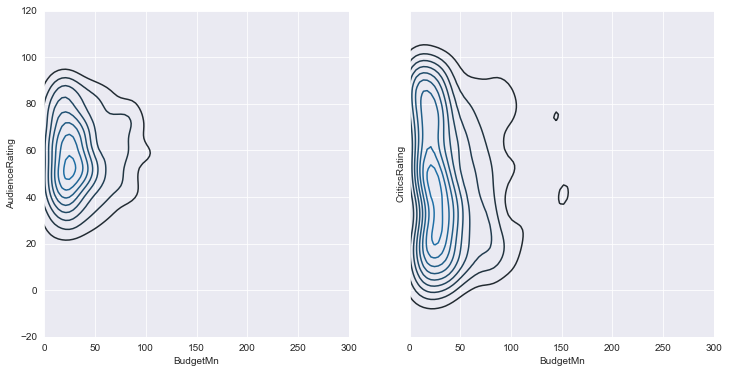

In [46]:
sns.set_style('darkgrid')
f, axes = plt.subplots(1,2,figsize=(12,6),sharex=True,sharey=True)
k3 = sns.kdeplot(movies.BudgetMn,movies.AudienceRating,ax=axes[0])
k4 = sns.kdeplot(movies.BudgetMn,movies.CriticsRating,ax=axes[1])
k3.set(ylim=(-20,120),xlim=(0,300))

In [ ]:
#Boxplot Vs Violinplot

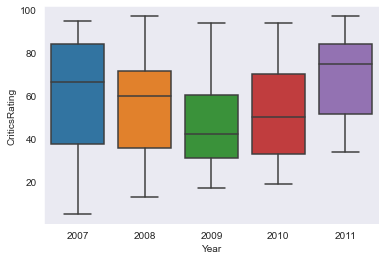

In [181]:
#s1 = sns.boxplot(data=movies,y='CriticsRating',x='Genre')
s3 = sns.boxplot(data=movies[movies.Genre == 'Drama'],y='CriticsRating',x='Year')

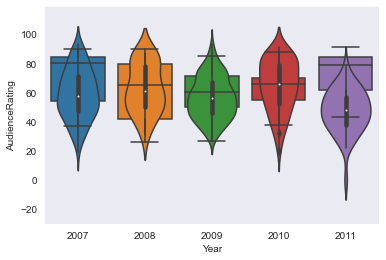

In [182]:
s2 = sns.violinplot(data=movies,x='Genre',y='AudienceRating')
s4 = sns.boxplot(data=movies[movies.Genre == 'Drama'],y='AudienceRating',x='Year')

In [183]:
#Facet Grid

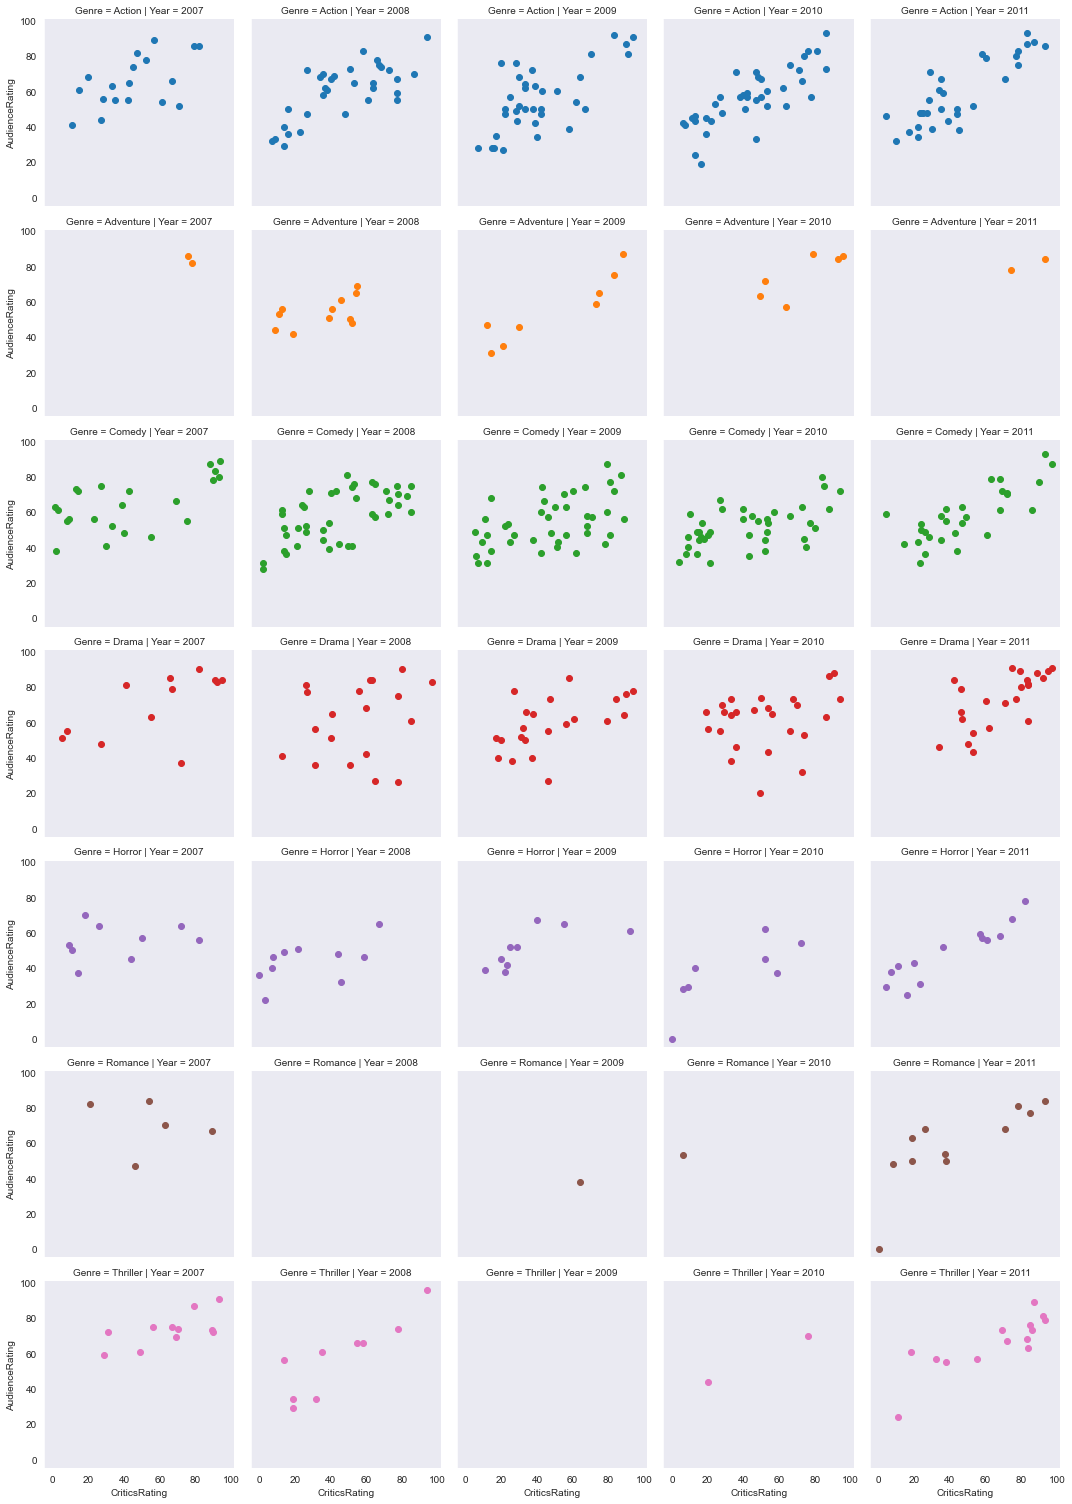

In [191]:
g = sns.FacetGrid(data=movies,row='Genre',col='Year',hue='Genre')
g = g.map(plt.scatter,'CriticsRating','AudienceRating')

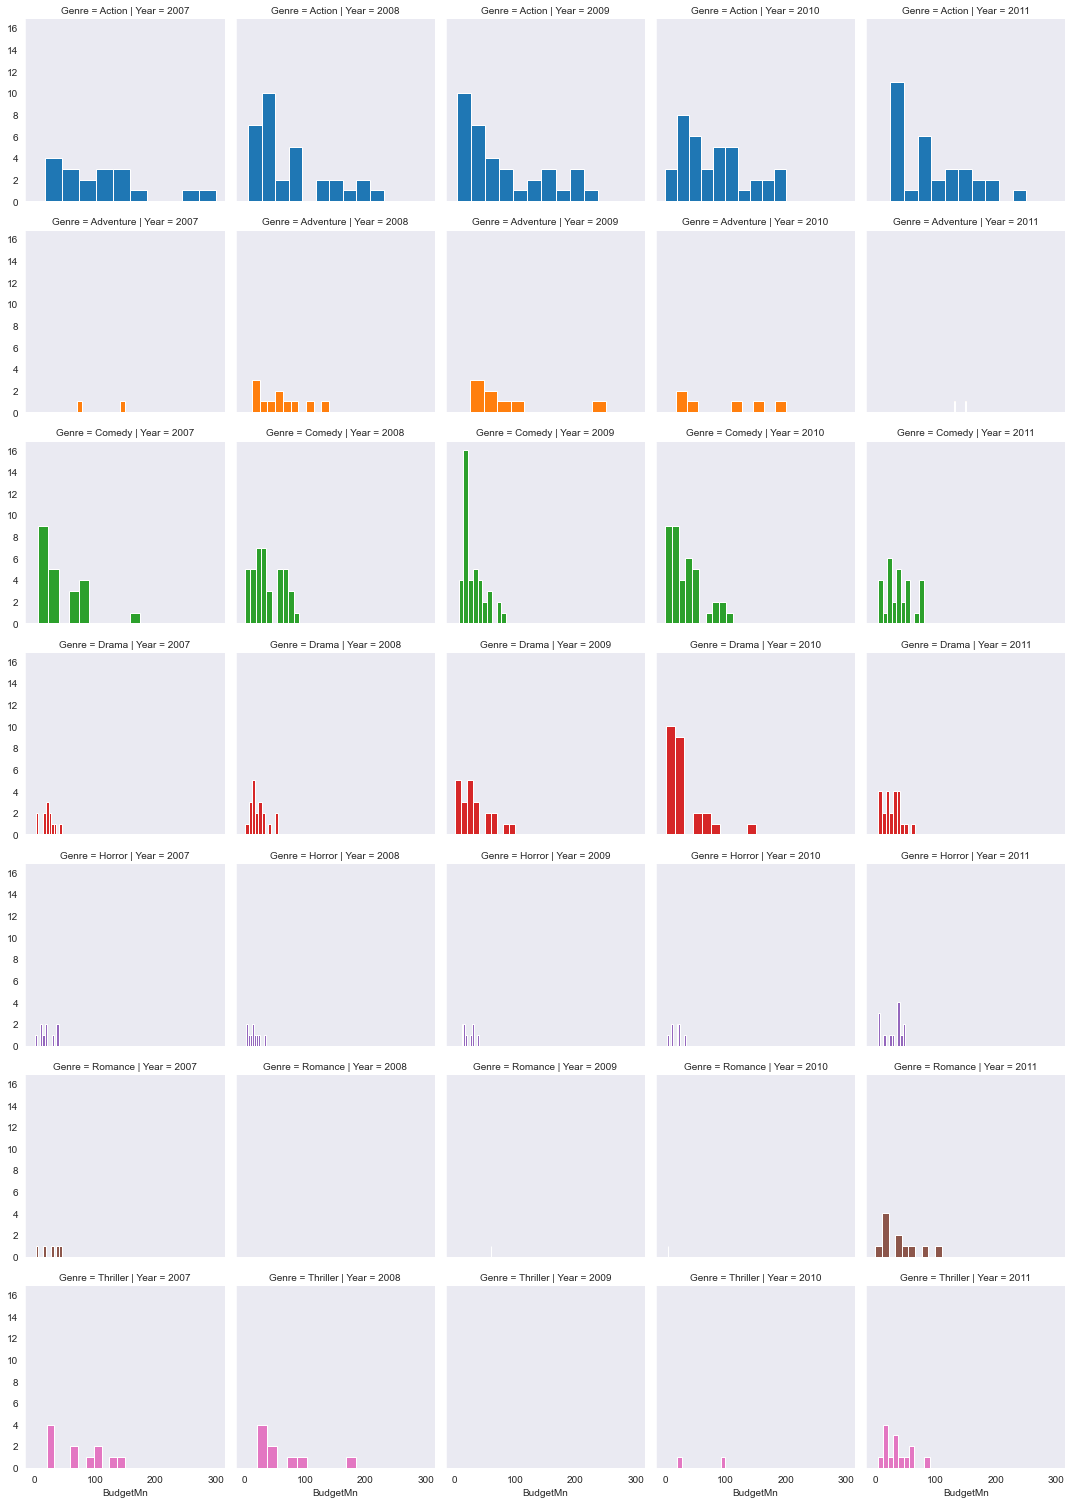

In [193]:
g = sns.FacetGrid(data=movies,row='Genre',col='Year',hue='Genre')
g = g.map(plt.hist,'BudgetMn')

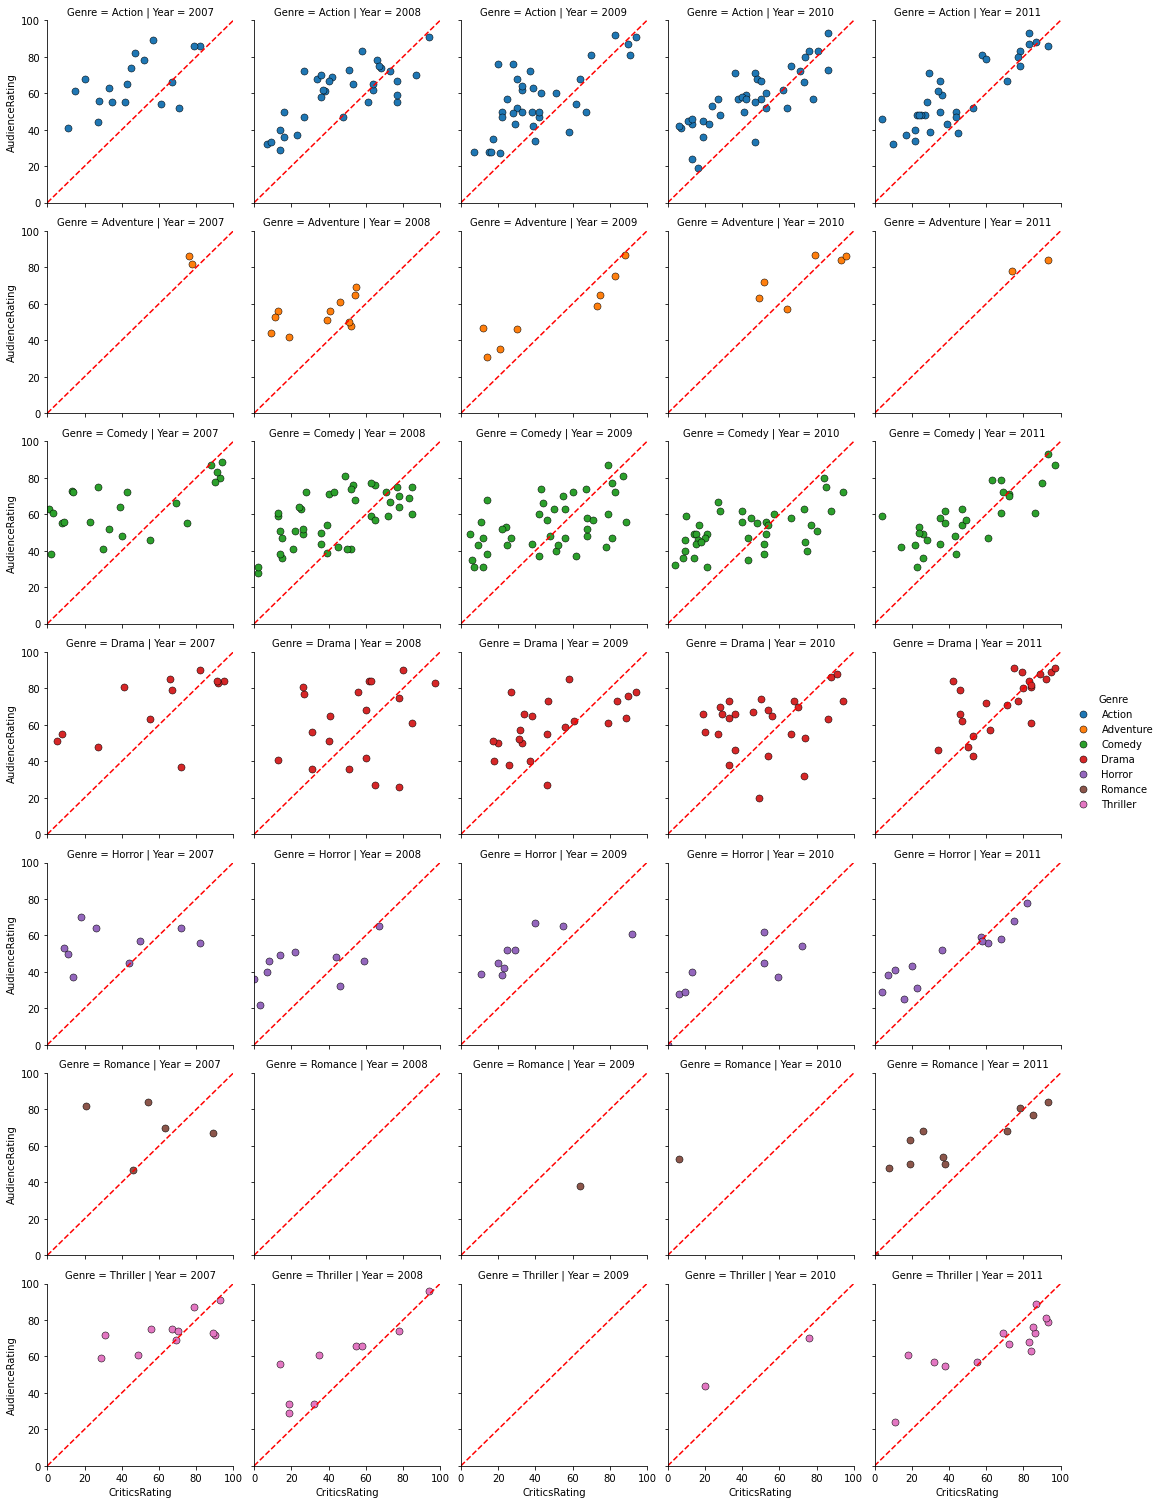

In [20]:
#back to scatter plot
g = sns.FacetGrid(data=movies,row='Genre',col='Year',hue='Genre')
kws = dict(s=50,linewidth=0.5,edgecolor='black')
g = g.map(plt.scatter,'CriticsRating','AudienceRating',**kws)
#Accessing Axes and adding Diagonals
g.set(xlim=(0,100),ylim=(0,100))
for ax in g.axes.flat:
    ax.plot((0,100),(0,100),c='Red',ls='--')
g.add_legend()

In [29]:
## Building the DashBoard

In [30]:
#import section
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

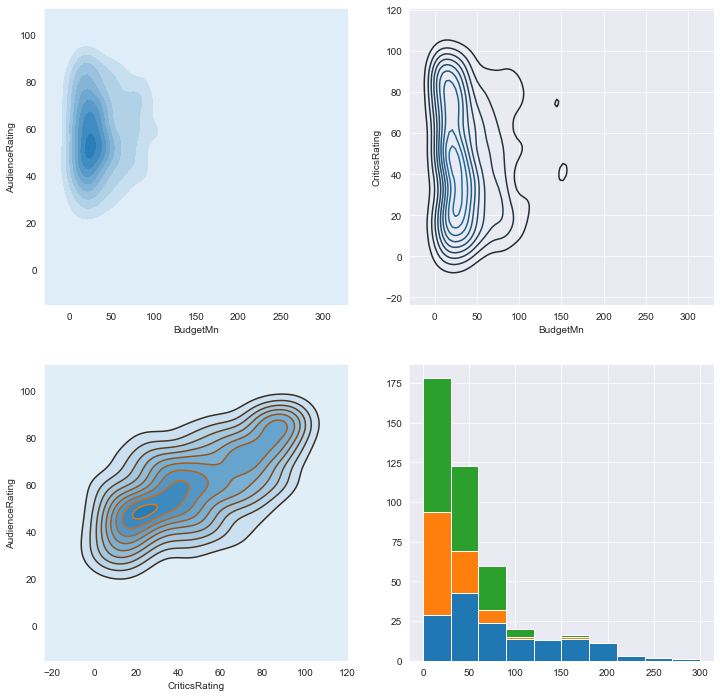

In [8]:
#Create 2x2 subplot to plot data
sns.set_style('darkgrid')
f, axes = plt.subplots(nrows=2,ncols=2,figsize=(12,12))
k1 = sns.kdeplot(movies.BudgetMn, movies.AudienceRating,ax=axes[0,0],shade=True)
k2 = sns.kdeplot(movies.BudgetMn, movies.CriticsRating, ax=axes[0,1])
k3 = sns.kdeplot(movies.CriticsRating, movies.AudienceRating,ax=axes[1,0],shade=True,shade_lowest=True)
#Following line of code for better visual effects
k3 = sns.kdeplot(movies.CriticsRating,movies.AudienceRating,ax=axes[1,0],shade_lowest=True)
#k4 = sns.scatterplot(data=movies,x='CriticsRating',y='AudienceRating',hue='Genre', ax=axes[1,1])
#k1.set(xlim=(-20,120),ylim=(-20,120))

#How to plot plt graph
axes[1,1].hist([movies[movies['Genre'] == 'Action'].BudgetMn,movies[movies['Genre'] == 'Drama'].BudgetMn,
          movies[movies['Genre'] == 'Comedy'].BudgetMn],bins=10,stacked = True,)
plt.show()

In [ ]:
#More styling

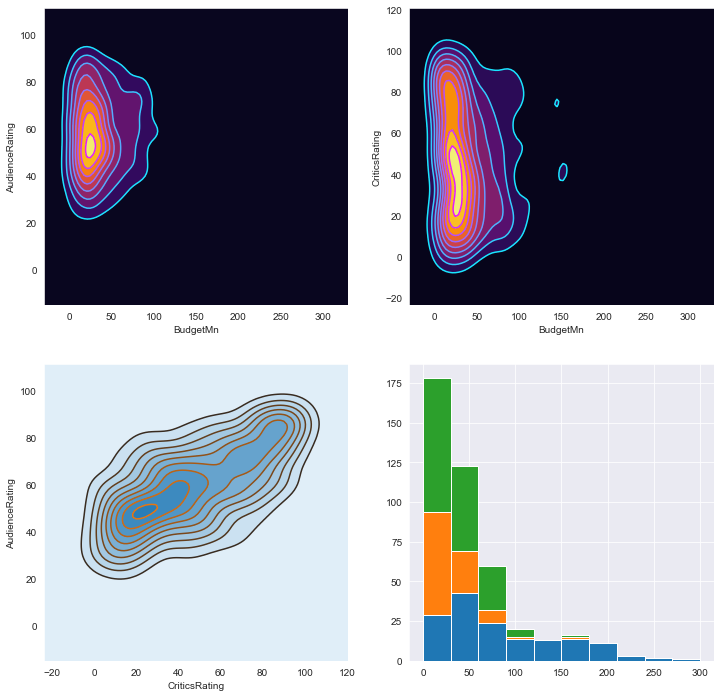

In [17]:
sns.set_style('darkgrid')
f, axes = plt.subplots(nrows=2,ncols=2,figsize=(12,12))
#plot[0,0]
k1 = sns.kdeplot(movies.BudgetMn, movies.AudienceRating,ax=axes[0,0],shade=True, cmap='inferno')
k1 = sns.kdeplot(movies.BudgetMn,movies.AudienceRating,ax=axes[0,0],cmap='cool',shade_lowest=True)

#plot[0,1]
k2 = sns.kdeplot(movies.BudgetMn, movies.CriticsRating, ax=axes[0,1],shade=True, cmap='inferno')
k2 = sns.kdeplot(movies.BudgetMn, movies.CriticsRating, ax=axes[0,1], cmap='cool')

#plot[1,0]
k3 = sns.kdeplot(movies.CriticsRating, movies.AudienceRating,ax=axes[1,0],shade=True,shade_lowest=True)
k3 = sns.kdeplot(movies.CriticsRating,movies.AudienceRating,ax=axes[1,0],shade_lowest=True)

#plot[1,1]
#k4 = sns.scatterplot(data=movies,x='CriticsRating',y='AudienceRating',hue='Genre', ax=axes[1,1])
#k1.set(xlim=(-20,120),ylim=(-20,120))

#How to plot plt graph
axes[1,1].hist([movies[movies['Genre'] == 'Action'].BudgetMn,movies[movies['Genre'] == 'Drama'].BudgetMn,
          movies[movies['Genre'] == 'Comedy'].BudgetMn],bins=10,stacked = True,)
plt.show()

In [19]:
#Thematic edits

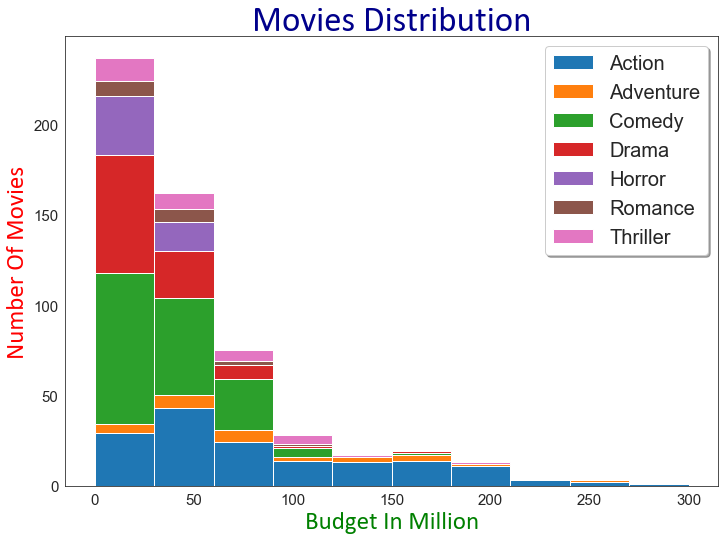

In [56]:
list1 = list()
mylabels = list()
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMn)
    mylabels.append(gen)
    
    
sns.set_style('white')
fig, ax = plt.subplots()
fig.set_size_inches(11.7,8.27) # size of A4 paper

plt.hist(list1,bins=10,stacked=True, label=mylabels) #'''Color=(specifi seven differnt color)'''

#Titles
plt.title('Movies Distribution',fontsize=35,color='DarkBlue',fontname='Calibri')
plt.ylabel('Number Of Movies',fontsize=25,color='Red',fontname='Calibri')
plt.xlabel('Budget In Million',fontsize=25,color='Green',fontname='Calibri')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(frameon=True,fancybox=True,shadow=True,framealpha=1,prop={'size':20})
plt.show()